# Homogeneous deformation

Often described as deformation during which lines remain as lines and parallel lines remain parallel. Homogeneous deformation could be described as **affine transformation** of initial coordinates

$$\begin{align*}x &= aX+bY+t_X \\ y &= cX+dY+t_Y \end{align*}$$

or in matrix form using homogeneous coordinates:

$$ \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}=\begin{bmatrix} a & b & t_X \\ c & d & t_Y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}X \\ Y \\ 1 \end{bmatrix}$$

**Properties of homogeneous deformation are not spatially dependent**

## Deformation gradient

Without translation $\vec{t}$ the homogeneous deformation (rotation and strain) could be described as:

$$\begin{align*}x &= aX+bY \\ y &= cX+dY \end{align*}$$

$$ \begin{bmatrix}x \\ y\end{bmatrix}=\begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix}X \\ Y\end{bmatrix}$$

or im matrix form

$$x=\mathbf{F}X$$

where $ \mathbf{F} $ is so called **deformation gradient**.

Note, that as we excluded translation, the origin of coordinates do not change during deformation:

$$ \begin{bmatrix} 0 \\ 0  \end{bmatrix}=\mathbf{F}\begin{bmatrix} 0 \\ 0  \end{bmatrix} $$

## Displacement gradient

Displacement of particle is vector between initial and final postion, i.e:

\begin{align*}u &= x-X = aX+bY-X = (a-1)X+bY\\ v &= y-Y = cX+dY-Y = cX+(d-1)Y\end{align*}

$$ \begin{bmatrix}u \\ v\end{bmatrix}=\begin{bmatrix} a-1 & b \\ c & d-1 \end{bmatrix}\begin{bmatrix}X \\ Y\end{bmatrix}$$

or

$$u=(\mathbf{F}-\mathbf{I})X=\mathbf{\nabla u}X$$

where $\mathbf{\nabla u}$ is so called **displacement gradient**.

## Let's Python it

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Lets try to visualize how unit circle deforms during homogeneous deformation:

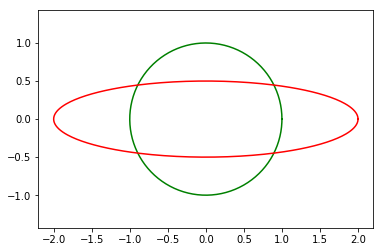

In [2]:
# parametric definition of unit circle
theta = linspace(0, 2*pi, 300)
Xc, Yc = cos(theta), sin(theta)
plot(Xc, Yc, 'g')

# Apply deformation gradient and plot ellipse
F = array([[2, 0], [0, 0.5]])
xe, ye = dot(F, [Xc, Yc])
plot(xe, ye, 'r')
axis('equal');

Lets try to visualize how square deforms during homogeneous deformation:

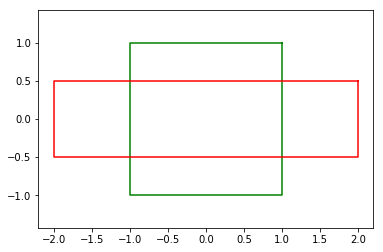

In [3]:
# coordinates of square
Xs = [1, -1, -1, 1, 1]
Ys = [1, 1, -1, -1, 1]
plot(Xs, Ys, 'g')

# Apply deformation gradient and plot result
F = array([[2, 0], [0, 0.5]])
xn, yn = dot(F, [Xs, Ys])
plot(xn, yn, 'r')
axis('equal');

To visualize deformation gradient $\mathbf{F}$ we have to calculate displacement for points on regular grid and plot it using command `quiver`.

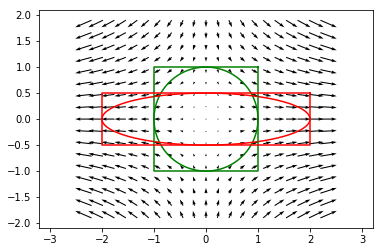

In [4]:
# create rectangular grid
X, Y = meshgrid(linspace(-2.2, 2.2, 21), linspace(-1.9, 1.9, 17))

# Apply deformation gradient. As [X, Y] is 3D array, we need
# special function to treat dot product properly. tensordot
# can do it.
x, y = tensordot(F, [X, Y], axes=1)

# plot displacement vectors on all point
quiver(X, Y, x-X, y-Y, angles='xy')
plot(Xc, Yc, 'g', xe, ye, 'r')
plot(Xs, Ys, 'g', xn, yn, 'r')
axis('equal');

We can also calculate displacements directly using displacement gradient $\mathbf{\nabla u} = \mathbf{F} - \mathbf{I}$:

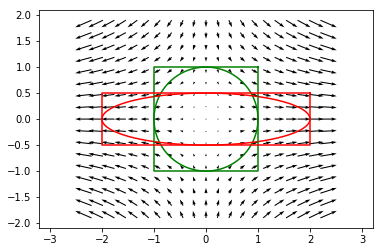

In [5]:
# calculate displacements
J = F - eye(2)
u, v = tensordot(J, [X, Y], axes=1)

# plot
quiver(X, Y, u, v, angles='xy')
plot(Xc, Yc, 'g', xe, ye, 'r')
plot(Xs, Ys, 'g', xn, yn, 'r')
axis('equal');

## Using functions in Python

### What are Functions?
Functions are a convenient way to divide your code into useful blocks, allowing us to order our code, make it more readable, reuse it and save some time. Also functions are a key way to define interfaces so programmers can share their code.

### How do you write functions in Python?
As we have seen already, Python makes use of blocks. A block is a area of code of written in the format of:
```
block_head: 
    1st block line 
    2nd block line 
    ...
```
Where a block line is more Python code (even another block), and the block head is of the following format: block_keyword block_name(argument1,argument2, ...) Block keywords you already know are "if", "for", and "while".

Functions in python are defined using the block keyword "def", followed with the function's name as the block's name. For example:

In [6]:
def my_function():
    print("Hello from my_function!")

Functions may also receive arguments (variables passed from the caller to the function). For example:

In [7]:
def my_function_with_args(username, greeting):
    print("Hello {}, I wish you {}".format(username, greeting))

Functions may return a value to the caller, using the keyword- 'return' . For example:

In [8]:
def sum_two_numbers(a, b):
    return a + b

### How do you call functions in Python?
Simply write the function's name followed by (), placing any required arguments within the brackets. For example, lets call the functions written above (in the previous example):

In [9]:
# print a simple greeting 
my_function()

#prints - "Hello Johny, I wish you a great day!"
my_function_with_args("Johny", "a great day!")

# after this line x will hold the value 7!
x = sum_two_numbers(4, 3)
print(x)

Hello from my_function!
Hello Johny, I wish you a great day!
7


## Functions to visualize strain ellipse and displacement field
These functions are provided in `sg2lib.py` library in repository, so later you can import them as `from sg2lib import *`

In [10]:
from pylab import *
from scipy import linalg as la

def def_ellipse(F):
    # Draw strain ellipse from deformation gradient
    theta = linspace(0, 2*pi, 180)
    xc, yc = cos(theta), sin(theta)
    x,y = dot(F, [xc,yc])
    plot(xc, yc, 'r', x, y, 'g')
    u, s, v = svd(F)
    plot(x, y, 'k', lw=2)
    quiver(zeros(2), zeros(2),
               hstack((s*u[0],-s*u[0])), hstack((s*u[1],-s*u[1])),
               scale=1, units='xy')
    axis('equal')

def dis_ellipse(J):
    # Draw strain ellipse from displacement gradient
    J = asarray(J)
    F = J + eye(2)
    def_ellipse(F)

def dis_field(J):
    # Visualize displacement field from
    # displacement gradient
    X, Y = meshgrid(linspace(-3, 3, 21),
                    linspace(-2, 2, 17))
    u, v = tensordot(J, [X, Y], axes=1)
    quiver(X, Y, u, v, angles='xy')
    axis('equal')

def def_field(F):
    # Visualize displacement field from
    # deformation gradient
    F = asarray(F)
    J = F - eye(2)
    dis_field(J)

def dis_show(J):
    # Draw displacement field and deformation ellipse
    # from displacement gradient
    dis_field(J)
    dis_ellipse(J)
    show()

def def_show(F):
    # Draw displacement field and deformation ellipse
    # from deformation gradient
    def_field(F)
    def_ellipse(F)
    show()

To use defined function we simply define deformation or displacement gradient and call appropriate functions:

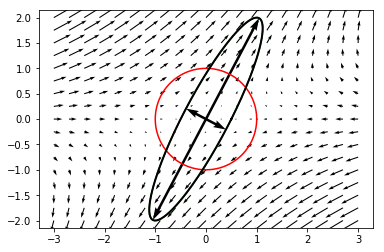

In [11]:
# Deformation gradient
F = array([[0.5, 1],
           [0  , 2]])
def_field(F)
def_ellipse(F)

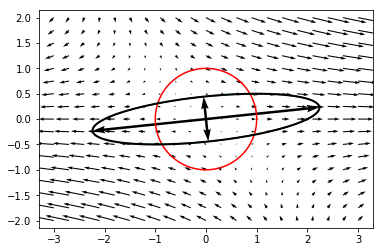

In [12]:
# Displacement gradient
J = array([[1,    1],
           [0, -0.5]])
dis_field(J)
dis_ellipse(J)

In [13]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./css/sg2.css", "r").read()
    return HTML(styles)
css_styling()